# Computer Vision



Select an RGB image of your choosing from somewhere on the internet. 

Import the image and display it.

In [0]:
!pip install imageio

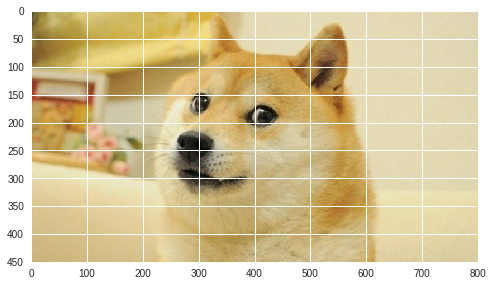

In [0]:
import imageio
import matplotlib.pyplot as plt

url = 'http://i0.kym-cdn.com/entries/icons/mobile/000/013/564/doge.jpg'
img = imageio.imread(url)

plt.imshow(img);

Generate a grayscale version of the image and display it again.

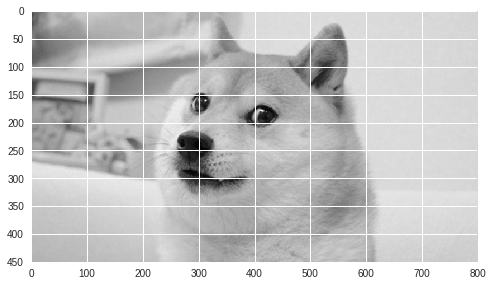

In [0]:
from skimage import color
from skimage.exposure import rescale_intensity

grayscale = rescale_intensity(color.rgb2gray(img))
plt.imshow(grayscale, cmap = 'gray');

Use Canny Edge Detection to find the edges in the image. Display the Canny Edge Detection image. 

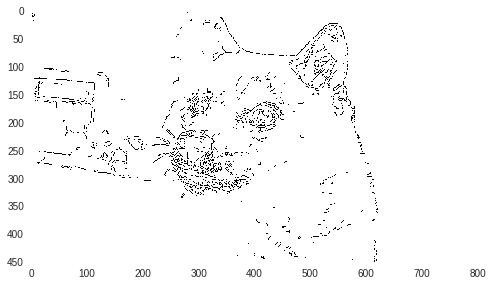

In [0]:
import numpy as np
import argparse
import glob
import cv2
import imageio
import matplotlib.pyplot as plt

def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
 
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
 
	# return the edged image
	return edged

edges = cv2.Canny(img, 100, 70)
# edges = auto_canny(img)
plt.imshow(edges);

Compute the convolution of the image with the following Difference of Gaussian (DoG) filter: 

(450, 800)


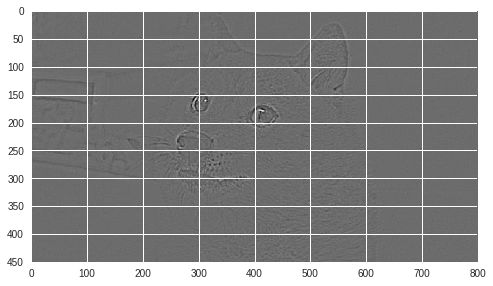

In [0]:
import scipy.ndimage as nd

dog_filter = np.array([[1,1,1,1,1],[1,-3,-3,-3,1],[1,-3,8,-3,1],[1,-3,-3,-3,1],[1,1,1,1,1]])

C = nd.convolve(grayscale,dog_filter)

plt.imshow(C)

# Deep Convolutional Neural Networks



Use the softmax function to transform the following vector to probability values:

$\begin{bmatrix}
4&5&9&2
\end{bmatrix}$

In [0]:
def softmax(n):
    n = np.array(n)
    e = np.exp(n)
    return e/np.sum(e)

x = [4, 5, 9, 2]

print(softmax(x))

[6.56742084e-03 1.78521007e-02 9.74691675e-01 8.88803760e-04]


Use the Keras library to classify the images of the MNIST-fashion dataset using a simple convolutional neural network. This dataset is just like MNIST but has grayscale images of different articles of clothing. It also has 10 classes, so any code that works on the MNIST dataset should work on this dataset without modification. I'll help you with the image preparation, and will limit the number of classes to 2 for fast training times. We will focus only on classifying pullovers and shirts.

(28, 28)
channels_first


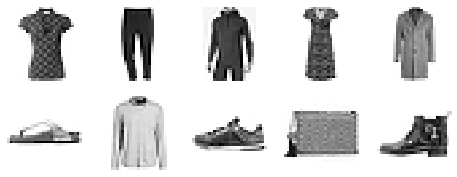

x_train shape: (12000, 1, 28, 28)
12000 train samples
2000 test samples


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# What are the dimensions of a single image?
print(x_train[0].shape)

# input image dimensions
img_rows, img_cols = 28,28

if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
    
print(K.image_data_format())

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    plt.imshow(np.squeeze(im, axis=2))
plt.show()
    
#Only look at 2s and 6s
num_classes = 2

# Create boolean arrays for train and test
train_picks = np.logical_or(y_train==2,y_train==6)
test_picks = np.logical_or(y_test==2,y_test==6)

# Filter train and test based on boolean arrays
x_train = x_train[train_picks]
x_test = x_test[test_picks]
y_train = np.array(y_train[train_picks]==2,dtype=int)
y_test = np.array(y_test[test_picks]==2,dtype=int)

# Scale pixel values to be floats between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [0]:
model = Sequential() 
model.add(Conv2D(4, (3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

np.random.seed(42)

modelfit = model.fit(x_train, y_train, batch_size = 3000, epochs = 100, validation_data=(x_test, y_test), shuffle=True)

Train on 12000 samples, validate on 2000 samples
Epoch 1/100
12000/12000 [==============================] - 2s 186us/step - loss: 0.7091 - acc: 0.4960 - val_loss: 0.6902 - val_acc: 0.5205
Epoch 2/100
12000/12000 [==============================] - 0s 26us/step - loss: 0.6926 - acc: 0.5216 - val_loss: 0.6877 - val_acc: 0.6070
Epoch 3/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.6862 - acc: 0.5657 - val_loss: 0.6831 - val_acc: 0.6575
Epoch 4/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.6799 - acc: 0.5957 - val_loss: 0.6725 - val_acc: 0.6695
Epoch 5/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.6704 - acc: 0.6137 - val_loss: 0.6570 - val_acc: 0.6695
Epoch 6/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.6545 - acc: 0.6347 - val_loss: 0.6375 - val_acc: 0.6710
Epoch 7/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.6413 - acc: 0.6417 - val_loss: 0.6187 - 

12000/12000 [==============================] - 0s 25us/step - loss: 0.4998 - acc: 0.7590 - val_loss: 0.4827 - val_acc: 0.7815
Epoch 18/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.4898 - acc: 0.7690 - val_loss: 0.4748 - val_acc: 0.7865
Epoch 19/100
12000/12000 [==============================] - 0s 24us/step - loss: 0.4810 - acc: 0.7795 - val_loss: 0.4596 - val_acc: 0.7990
Epoch 20/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.4694 - acc: 0.7851 - val_loss: 0.4451 - val_acc: 0.8050
Epoch 21/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.4612 - acc: 0.7952 - val_loss: 0.4357 - val_acc: 0.8125
Epoch 22/100
12000/12000 [==============================] - 0s 26us/step - loss: 0.4495 - acc: 0.8022 - val_loss: 0.4279 - val_acc: 0.8120
Epoch 23/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.4340 - acc: 0.8099 - val_loss: 0.4127 - val_acc: 0.8235
Epoch 24/100
12000/12000 [==============

12000/12000 [==============================] - 0s 24us/step - loss: 0.3668 - acc: 0.8465 - val_loss: 0.3378 - val_acc: 0.8655
Epoch 34/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.3634 - acc: 0.8471 - val_loss: 0.3352 - val_acc: 0.8670
Epoch 35/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.3537 - acc: 0.8546 - val_loss: 0.3323 - val_acc: 0.8660
Epoch 36/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.3506 - acc: 0.8550 - val_loss: 0.3229 - val_acc: 0.8675
Epoch 37/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.3446 - acc: 0.8576 - val_loss: 0.3166 - val_acc: 0.8720
Epoch 38/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.3371 - acc: 0.8607 - val_loss: 0.3143 - val_acc: 0.8735
Epoch 39/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.3342 - acc: 0.8597 - val_loss: 0.3030 - val_acc: 0.8770
Epoch 40/100
12000/12000 [==============

12000/12000 [==============================] - 0s 25us/step - loss: 0.2973 - acc: 0.8787 - val_loss: 0.2739 - val_acc: 0.8900
Epoch 50/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.2971 - acc: 0.8779 - val_loss: 0.2713 - val_acc: 0.8945
Epoch 51/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.2950 - acc: 0.8771 - val_loss: 0.2694 - val_acc: 0.8905
Epoch 52/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.2935 - acc: 0.8787 - val_loss: 0.2687 - val_acc: 0.8925
Epoch 53/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.2897 - acc: 0.8815 - val_loss: 0.2692 - val_acc: 0.8950
Epoch 54/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.2866 - acc: 0.8831 - val_loss: 0.2771 - val_acc: 0.8885
Epoch 55/100
12000/12000 [==============================] - 0s 24us/step - loss: 0.2859 - acc: 0.8811 - val_loss: 0.2674 - val_acc: 0.8940
Epoch 56/100
12000/12000 [==============

12000/12000 [==============================] - 0s 25us/step - loss: 0.2740 - acc: 0.8878 - val_loss: 0.2518 - val_acc: 0.8985
Epoch 66/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.2682 - acc: 0.8916 - val_loss: 0.2511 - val_acc: 0.8990
Epoch 67/100
12000/12000 [==============================] - 0s 24us/step - loss: 0.2609 - acc: 0.8917 - val_loss: 0.2599 - val_acc: 0.8945
Epoch 68/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.2670 - acc: 0.8892 - val_loss: 0.2549 - val_acc: 0.8935
Epoch 69/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.2653 - acc: 0.8882 - val_loss: 0.2487 - val_acc: 0.8995
Epoch 70/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.2622 - acc: 0.8922 - val_loss: 0.2494 - val_acc: 0.8990
Epoch 71/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.2608 - acc: 0.8947 - val_loss: 0.2467 - val_acc: 0.9000
Epoch 72/100
12000/12000 [==============

12000/12000 [==============================] - 0s 25us/step - loss: 0.2553 - acc: 0.8943 - val_loss: 0.2414 - val_acc: 0.9000
Epoch 82/100
12000/12000 [==============================] - 0s 24us/step - loss: 0.2491 - acc: 0.8973 - val_loss: 0.2421 - val_acc: 0.9005
Epoch 83/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.2550 - acc: 0.8954 - val_loss: 0.2384 - val_acc: 0.9030
Epoch 84/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.2485 - acc: 0.8982 - val_loss: 0.2356 - val_acc: 0.9030
Epoch 85/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.2516 - acc: 0.8993 - val_loss: 0.2394 - val_acc: 0.9030
Epoch 86/100
12000/12000 [==============================] - 0s 24us/step - loss: 0.2516 - acc: 0.8981 - val_loss: 0.2449 - val_acc: 0.9020
Epoch 87/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.2480 - acc: 0.9002 - val_loss: 0.2384 - val_acc: 0.9000
Epoch 88/100
12000/12000 [==============

12000/12000 [==============================] - 0s 25us/step - loss: 0.2377 - acc: 0.9031 - val_loss: 0.2316 - val_acc: 0.8995
Epoch 98/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.2393 - acc: 0.9018 - val_loss: 0.2331 - val_acc: 0.9040
Epoch 99/100
12000/12000 [==============================] - 0s 26us/step - loss: 0.2363 - acc: 0.9024 - val_loss: 0.2318 - val_acc: 0.9040
Epoch 100/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.2349 - acc: 0.9067 - val_loss: 0.2343 - val_acc: 0.9015


Plot your validation and test accuracies by epoch.

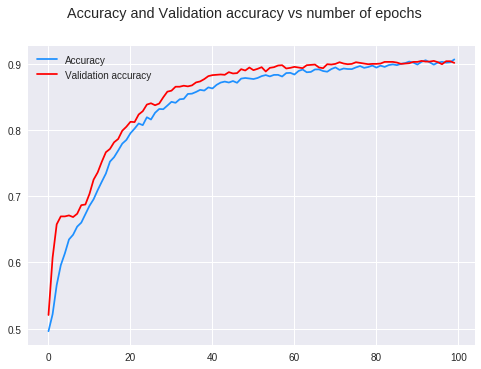

In [0]:
fig, ax = plt.subplots()

ax.plot(modelfit.history['acc'], 'dodgerblue', label='Accuracy')
ax.plot(modelfit.history['val_acc'], 'red', label='Validation accuracy')
fig.suptitle('Accuracy and Validation accuracy vs number of epochs')
ax.legend()

plt.show()